In [2]:
cd \\new-monster\t\PreyCapture\ENRICHMENT_ALL\Enrichment_Cohort4

\\new-monster\t\PreyCapture\ENRICHMENT_ALL\Enrichment_Cohort4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ssm
import sklearn.manifold as manifold

In [104]:
data = np.genfromtxt('compiled_preycapture_2.csv' ,delimiter=',')

condAll = data[:,3].copy()
sessAll = data[:,4].copy()

data_norm = data[:,0:3].copy()
data_norm[:,0] = np.abs(data_norm[:,0]/180);
data_norm[:,1] = data_norm[:,1]/600
data_norm[:,2] = data_norm[:,2]/10;

#data_norm[data_norm[:,2]<0.04,2]=0.04;
#data_norm[:,1] = np.log(data_norm[:,1])
#data_norm[:,2] = np.log(data_norm[:,2])


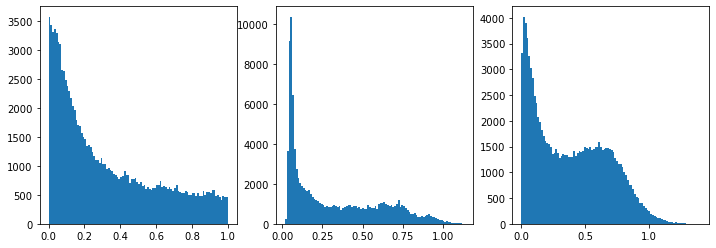

In [5]:
plt.figure(figsize = (12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(data_norm[:,i],100)
    

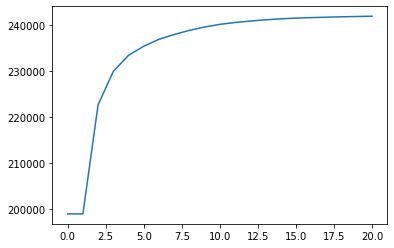

In [7]:
K = 6;
D = np.size(data_norm,1)
N_iters = 20
#test_hmm = ssm.HMM(K, D, observations="diagonal_gaussian")
test_hmm = ssm.HMM(K, D, observations="gaussian")


lls = test_hmm.fit(np.abs(data_norm), num_iters=N_iters,  init_method="kmeans")
zhat = test_hmm.most_likely_states(data_norm)
plt.plot(lls)

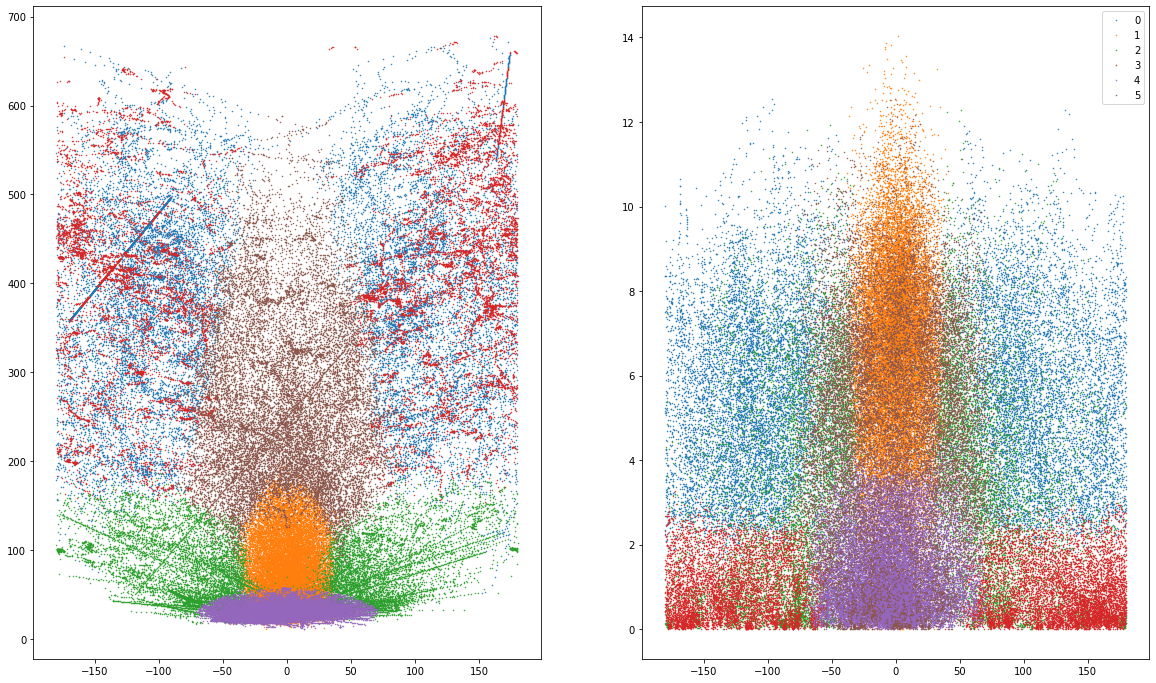

In [8]:
fig, axs = plt.subplots(1,2, figsize = (20,12))
for z in range(K):
    axs[0].plot(data[zhat==z,0],data[zhat==z,1],'.', markersize = 1,label = str(z))
    axs[1].plot(data[zhat==z,0],data[zhat==z,2],'.', markersize = 1, label = str(z))  
plt.legend()

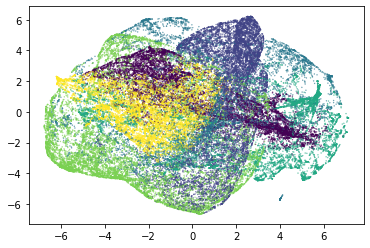

In [13]:
#tsne = manifold.TSNE(n_components=2, init='random', n_iter=250, perplexity = 50)
#Y = tsne.fit_transform(data_norm[0:-1:10,:])
#plt.scatter(Y[:,0],Y[:,1],s = 0.1,c = zhat[0:-1:2])

In [16]:
#mds= manifold.MDS(n_components=2, max_iter = 100, n_init = 1)
#Y = mds.fit_transform(data_norm[0:-1:20,:])
#plt.scatter(Y[:,0],Y[:,1],s = 0.1,c = zhat[0:-1:20])

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (16,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    for z in range(K):
        h,b = np.histogram(data[zhat==z,i],bins = 20)
        plt.plot(b[:-1],h)

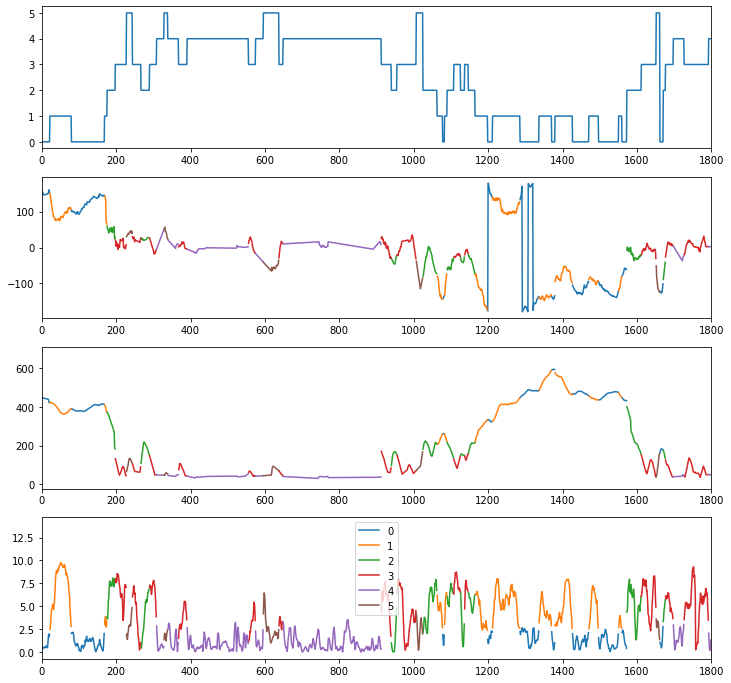

In [49]:
zhat = test_hmm.most_likely_states(data_norm)
xrange = (60*0,60*30)
plt.figure(figsize = (12,12))
plt.subplot(4,1,1)
plt.plot(zhat);
plt.xlim(xrange)
for i in range(3):
    plt.subplot(4,1,i+2)
    for z in range(K):
        d = data[:,i].copy();
        d[zhat!=z] = np.nan;
        plt.plot(d, label = str(z))
        plt.xlim(xrange)
plt.legend()

In [46]:
test_hmm.permute([3, 0, 5, 1, 4, 2])

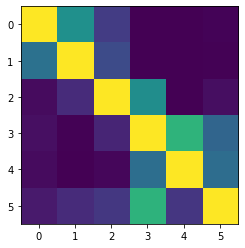

In [54]:
tm = test_hmm.transitions.transition_matrix
plt.imshow(tm, vmin = 0, vmax = 0.05)

In [43]:
test_hmm.permute(perm = [5, 4, 3, 2, 1, 0])

In [56]:
ssm.HMM?

In [32]:
tm = new_hmm.transitions.transition_matrix
plt.imshow(np.log10(tm), vmin = -4, vmax = 0)

AttributeError: 'NoneType' object has no attribute 'transitions'

In [55]:
meanT = np.zeros((K,2))
for z in range(K):
    for c in range(2):
        meanT[z,c] = (np.sum((zhat==z) & (condAll==c)))/np.sum(condAll==c)
meanT

array([[0.13033913, 0.13538849],
       [0.14528332, 0.18547416],
       [0.14053445, 0.16918959],
       [0.21021142, 0.20637505],
       [0.25888066, 0.17182345],
       [0.11475102, 0.13174925]])

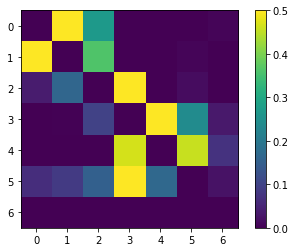

In [155]:
trans_mtx = np.zeros((K+1,K+1))
this_sess = sessAll[condAll==0]
for s in np.unique(this_sess):
    this_z = zhat[sessAll ==s]
    for i in range(len(this_z)-1):
        trans_mtx[this_z[i],this_z[i+1]] = trans_mtx[this_z[i],this_z[i+1]] + 1;
    trans_mtx[this_z[-1],K] = trans_mtx[this_z[-1],K] + 1
for i in range(K):
    trans_mtx[i,i]=0;
    trans_mtx[i,:] = trans_mtx[i,:] / np.sum(trans_mtx[i,:])
    #trans_mtx[i,i] = 1 - trans_mtx[i,i];
#plt.imshow(trans_mtx /len(np.unique(this_sess)), vmax = 5)
plt.imshow(trans_mtx, vmax = 0.5)
plt.colorbar()
stand_trans = trans_mtx.copy();    
#print(trans_mtx/len(np.unique(this_sess)))

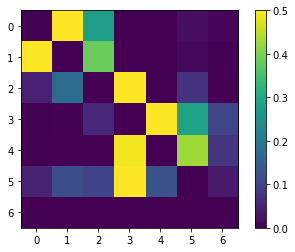

In [154]:
trans_mtx = np.zeros((K+1,K+1))
this_sess = sessAll[condAll==1]
for s in np.unique(this_sess):
    this_z = zhat[sessAll ==s]
    for i in range(len(this_z)-1):
        trans_mtx[this_z[i],this_z[i+1]] = trans_mtx[this_z[i],this_z[i+1]] + 1;
    trans_mtx[this_z[-1],K] = trans_mtx[this_z[-1],K] + 1
for i in range(K):
    trans_mtx[i,i]=0;
    trans_mtx[i,:] = trans_mtx[i,:] / np.sum(trans_mtx[i,:])
    #trans_mtx[i,i] = 1-trans_mtx[i,i];
#plt.imshow(trans_mtx /len(np.unique(this_sess)), vmax = 5)
plt.imshow(trans_mtx, vmax = 0.5)
plt.colorbar()
ee_trans = trans_mtx.copy();    
#print(trans_mtx/len(np.unique(this_sess)))

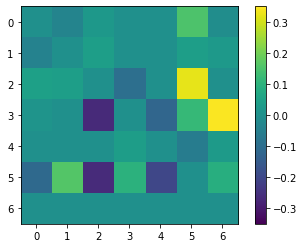

In [159]:
plt.imshow((ee_trans - stand_trans)/ (ee_trans+0.1), vmin = -0.35, vmax = 0.35)
plt.colorbar()

In [63]:
trans_pts

(array([    21,     79,    168, ..., 107821, 107858, 107872], dtype=int64),)

In [91]:
len(this_z)

70619